## *Loading Environment*

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)  
sns.set_palette('viridis')
sns.set_style("dark")
import warnings
warnings.filterwarnings("ignore")

import folium
from folium.plugins import HeatMap

## *Loading Data*

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")

## *Data Exploration*

In [3]:
df.shape

(7728394, 46)

In [5]:
df.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [5]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [6]:
df.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865,-84.059,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928,-82.831,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900,NaN,100.000,29.650,10.000,Calm,NaN,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063,-84.033,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000,33.300,100.000,29.670,10.000,SW,3.500,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day


**To identify the number of numerial columns**

In [7]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
numeric_df = df.select_dtypes(include=numerics)
num_numeric_cols = len(numeric_df.columns)

In [8]:
num_numeric_cols

13

**Exploring the missing Values**

In [9]:
missing_percentages = (df.isna().sum() / len(df)).sort_values(ascending=False)
missing_percentages

End_Lat                 0.440
End_Lng                 0.440
Precipitation(in)       0.285
Wind_Chill(F)           0.259
Wind_Speed(mph)         0.074
Visibility(mi)          0.023
Wind_Direction          0.023
Humidity(%)             0.023
Weather_Condition       0.022
Temperature(F)          0.021
Pressure(in)            0.018
Weather_Timestamp       0.016
Nautical_Twilight       0.003
Civil_Twilight          0.003
Sunrise_Sunset          0.003
Astronomical_Twilight   0.003
Airport_Code            0.003
Street                  0.001
Timezone                0.001
Zipcode                 0.000
City                    0.000
Description             0.000
Traffic_Signal          0.000
Roundabout              0.000
Station                 0.000
Stop                    0.000
Traffic_Calming         0.000
Country                 0.000
Turning_Loop            0.000
No_Exit                 0.000
End_Time                0.000
Start_Time              0.000
Severity                0.000
Railway   

In [10]:
missing_percentages[missing_percentages != 0]

End_Lat                 0.440
End_Lng                 0.440
Precipitation(in)       0.285
Wind_Chill(F)           0.259
Wind_Speed(mph)         0.074
Visibility(mi)          0.023
Wind_Direction          0.023
Humidity(%)             0.023
Weather_Condition       0.022
Temperature(F)          0.021
Pressure(in)            0.018
Weather_Timestamp       0.016
Nautical_Twilight       0.003
Civil_Twilight          0.003
Sunrise_Sunset          0.003
Astronomical_Twilight   0.003
Airport_Code            0.003
Street                  0.001
Timezone                0.001
Zipcode                 0.000
City                    0.000
Description             0.000
dtype: float64

In [11]:
type(missing_percentages)

pandas.core.series.Series

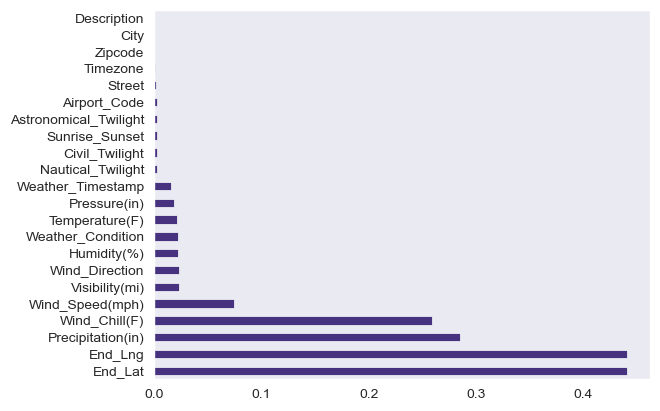

In [12]:
non_zero_missing = missing_percentages[missing_percentages != 0]
non_zero_missing.plot(kind="barh")
plt.show()

In [21]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Data Exploration of each Column
- To know the insight of each column

### *Source*

In [11]:
df["Source"].value_counts()

Source
Source1    4325632
Source2    3305373
Source3      97389
Name: count, dtype: int64

### *Severity*

In [74]:
df["Severity"].value_counts()

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

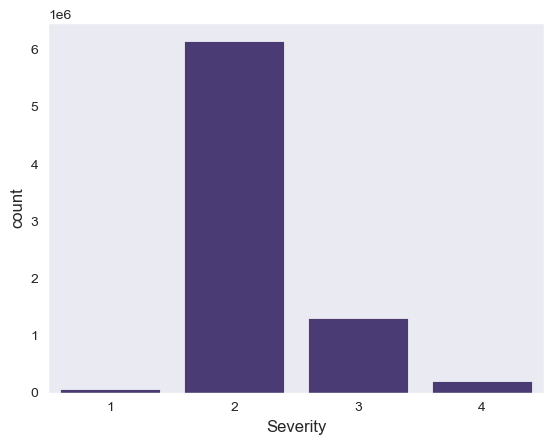

In [9]:
sns.countplot(x='Severity', data=df)
plt.show()

### *Start Time*

In [75]:
df["Start_Time"].value_counts()

Start_Time
2021-01-26 16:16:13    253
2021-01-26 16:17:33    170
2021-02-16 06:42:43    157
2021-11-21 18:37:51    125
2020-12-16 13:53:25     99
                      ... 
2019-06-17 08:32:29      1
2019-06-17 08:12:49      1
2019-06-17 08:05:59      1
2019-06-17 07:58:15      1
2019-08-23 18:52:06      1
Name: count, Length: 5801064, dtype: int64

In [16]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [87]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

In [17]:
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    18
Name: Start_Time, Length: 7728394, dtype: int32

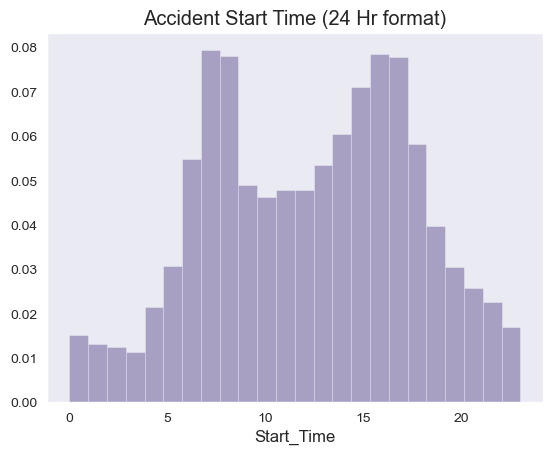

In [18]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True)
plt.title('Accident Start Time (24 Hr format)')
plt.show()

Observation (Which time the accident is high)
- Most accident occured btw 7 - 9 am in the morning
- Most accident accured btw 3 - 5 pm in the afternoon 
- possibly most of the victims are from working baground 

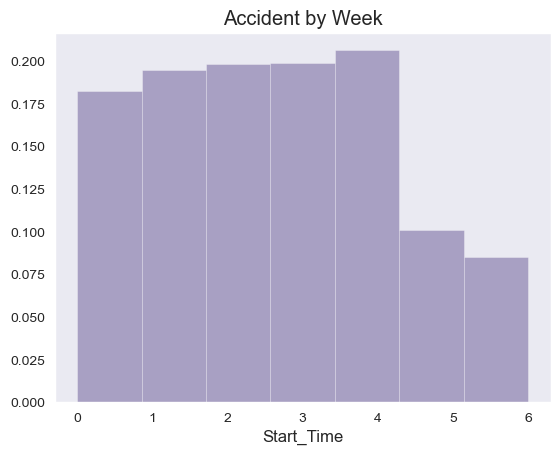

In [19]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)
plt.title('Accident by Week')
plt.show()

Obsevation ( Which day of the weak experiences most accidents)
- weekends have less accidents notes
- Most accident occured on Friday
- possibly the working sectors might be in some hurry

Since most accident occoured on Friday i will try to find at which time on Friday there was major accidents

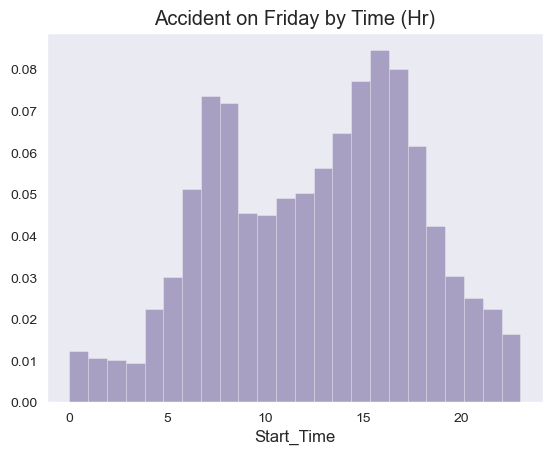

In [20]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 4]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.title('Accident on Friday by Time (Hr)')
plt.show()

Observation (On what time most accidents are noted on Friday)
- Most accidents can be seen in the moring (7-9 am) and in the evening (3-5 pm)
- moring is having very low number of accidents as compared to other times.

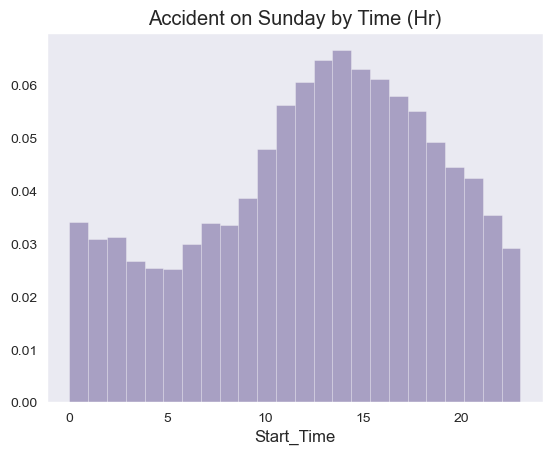

In [21]:
sundays_start_time = df['Start_Time'][df['Start_Time'].dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)
plt.title('Accident on Sunday by Time (Hr)')
plt.show()

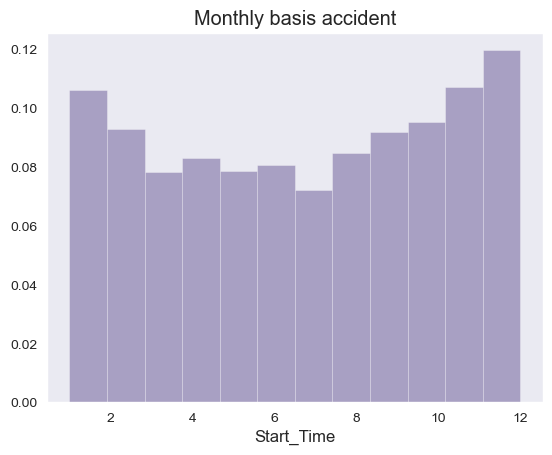

In [22]:
sns.distplot(df.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Monthly basis accident')
plt.show()

observations made (Which motnth is having high number of accidents)
- most of the accidents are on winter months.
- Least number of accidents are observed on summer months. 

In [100]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
7728389    2019
7728390    2019
7728391    2019
7728392    2019
7728393    2019
Name: Start_Time, Length: 7728394, dtype: int32

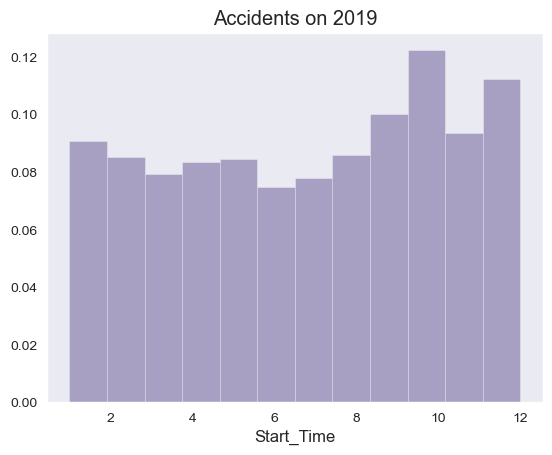

In [25]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2019')
plt.show()

Text(0.5, 1.0, 'Accidents on 2018')

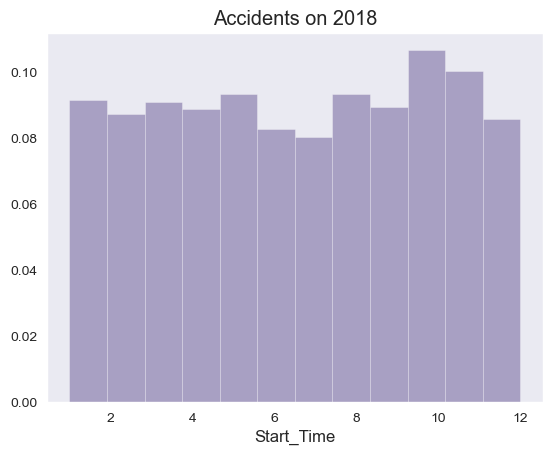

In [112]:
df_2019 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2018')

Text(0.5, 1.0, 'Accidents on 2017')

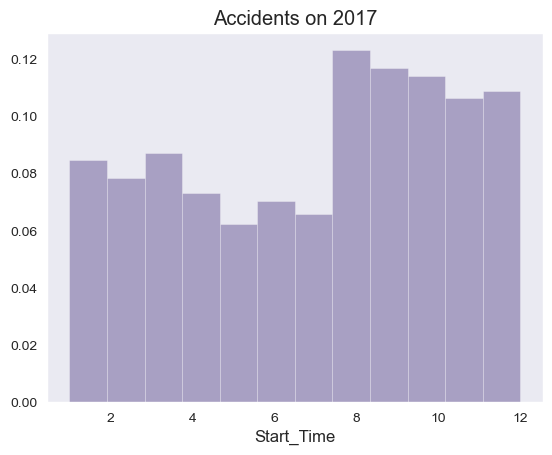

In [113]:
df_2019 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2017')

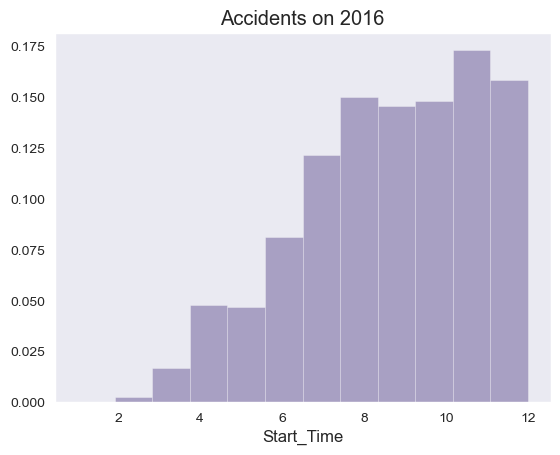

In [23]:
df_2019 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2016')
plt.show()

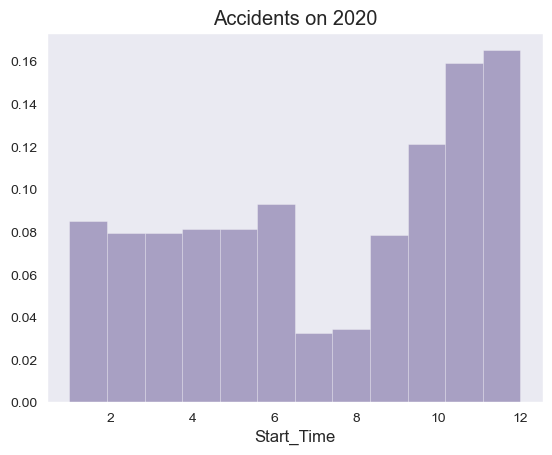

In [24]:
df_2019 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2019.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2020')
plt.show()

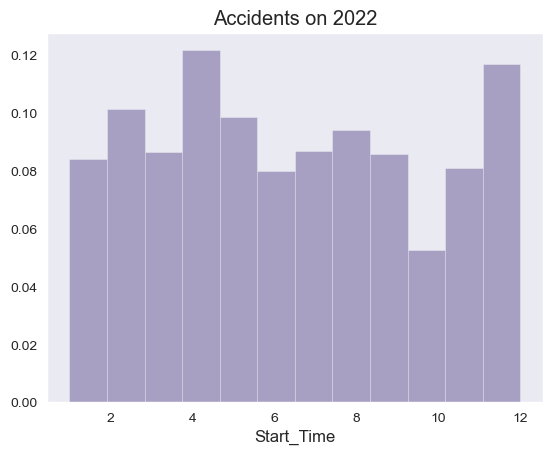

In [31]:
df_2022 = df[df.Start_Time.dt.year == 2022]
sns.distplot(df_2022.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)
plt.title('Accidents on 2022')
plt.savefig('my_plot.png', dpi=300)
plt.show()

Obervation (At what time on Sunday there is major number of accidents)
- There is a high number of accidents from 12-5 pm 
- Least number of accidents can be noted in the morning btw 2-5 am 

### *End Time*

In [76]:
df["End_Time"].value_counts()

End_Time
2021-11-22 08:00:00    112
2017-05-15 15:22:55     73
2019-10-26 09:14:51     49
2020-02-14 00:00:00     46
2018-11-25 02:51:02     46
                      ... 
2019-01-27 03:35:12      1
2019-01-27 03:01:18      1
2019-01-27 02:32:22      1
2019-01-27 02:29:26      1
2019-08-23 19:21:31      1
Name: count, Length: 6705355, dtype: int64

In [32]:
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')

In [33]:
df.End_Time.dt.hour

0          11
1           6
2           7
3           7
4           8
           ..
7728389    18
7728390    19
7728391    19
7728392    19
7728393    19
Name: End_Time, Length: 7728394, dtype: int32

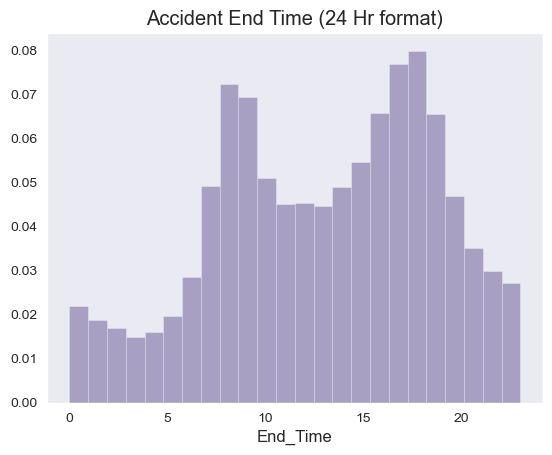

In [35]:
sns.distplot(df.End_Time.dt.hour, bins = 24, kde = False, norm_hist = True)
plt.title('Accident End Time (24 Hr format)')
plt.show()

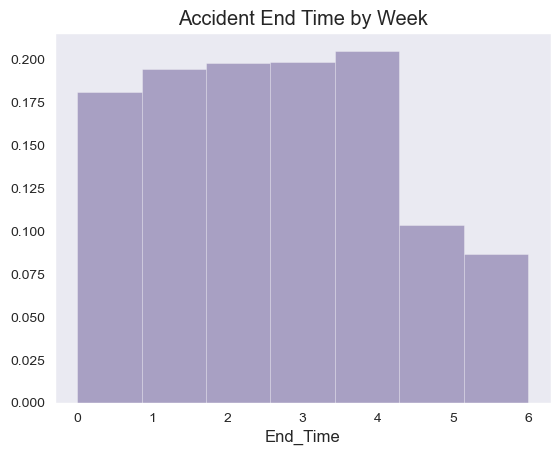

In [36]:
sns.distplot(df.End_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True)
plt.title('Accident End Time by Week')
plt.show()

There is not much difference btw the start time and end time so its better to dropp the end time as of now

In [77]:
df["Start_Lat"].value_counts()

Start_Lat
37.808    570
33.941    568
34.859    545
42.477    534
33.745    533
         ... 
40.855      1
38.224      1
41.525      1
41.521      1
34.239      1
Name: count, Length: 2428358, dtype: int64

In [78]:
df["Start_Lng"].value_counts()

Start_Lng
-122.367    578
-118.097    562
-82.260     545
-84.390     534
-83.112     534
           ... 
-117.401      1
-118.429      1
-121.742      1
-121.891      1
-117.848      1
Name: count, Length: 2482533, dtype: int64

### *Street*

In [79]:
df["Street"].value_counts()

Street
I-95 N                  78430
I-95 S                  74528
I-5 N                   71968
I-10 E                  55572
I-10 W                  53725
                        ...  
W Diamond Valley Dr         1
S Jasper St                 1
State RT 17 N               1
 S Lake Mary Jane Rd        1
473-401 Cutoff Rd           1
Name: count, Length: 336306, dtype: int64

In [41]:
df["Street"].nunique()

336306

In [44]:
accident_in_top_20 = df["Street"].value_counts().head(10)

<Axes: ylabel='Street'>

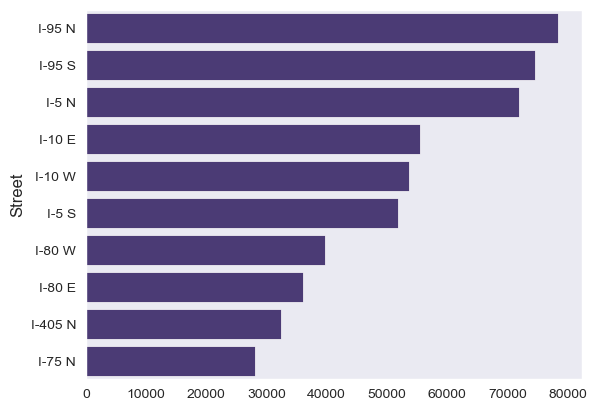

In [50]:
sns.barplot(x = accident_in_top_20.values, y = accident_in_top_20.index )

In [80]:
df["City"].value_counts()

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [81]:
df["County"].value_counts()

County
Los Angeles        526851
Miami-Dade         251601
Orange             241275
Harris             181196
Dallas             157024
                    ...  
Mclean                  1
Poquoson (City)         1
Dewitt                  1
Frontier                1
Ness                    1
Name: count, Length: 1871, dtype: int64

In [82]:
df["State"].value_counts()

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [9]:
df["Timezone"].value_counts()

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

In [10]:
df["Weather_Timestamp"].value_counts()

Weather_Timestamp
2022-03-13 01:53:00    1311
2021-01-26 15:53:00     651
2022-05-13 16:53:00     558
2022-03-13 01:55:00     545
2021-01-15 22:53:00     521
                       ... 
2018-08-31 14:01:00       1
2018-08-31 11:58:00       1
2018-08-31 10:36:00       1
2018-08-31 05:30:00       1
2019-08-23 01:20:00       1
Name: count, Length: 941331, dtype: int64

In [12]:
df["Temperature(F)"].value_counts()

Temperature(F)
77.000     170991
73.000     170898
68.000     163767
72.000     160498
75.000     158448
            ...  
1.600           1
-21.500         1
127.000         1
158.000         1
132.600         1
Name: count, Length: 860, dtype: int64

In [16]:
df["Weather_Condition"].value_counts()

Weather_Condition
Fair                         2560802
Mostly Cloudy                1016195
Cloudy                        817082
Clear                         808743
Partly Cloudy                 698972
                              ...   
Heavy Sleet / Windy                1
Sand / Windy                       1
Heavy Rain Shower / Windy          1
Blowing Snow Nearby                1
Drifting Snow                      1
Name: count, Length: 144, dtype: int64

In [18]:
df["Amenity"].value_counts()

Amenity
False    7632060
True       96334
Name: count, dtype: int64

In [19]:
df["Bump"].value_counts()

Bump
False    7724880
True        3514
Name: count, dtype: int64

In [20]:
df["Crossing"].value_counts()

Crossing
False    6854631
True      873763
Name: count, dtype: int64

In [21]:
df["Give_Way"].value_counts()

Give_Way
False    7691812
True       36582
Name: count, dtype: int64

In [24]:
df["No_Exit"].value_counts()

No_Exit
False    7708849
True       19545
Name: count, dtype: int64

In [25]:
df["Railway"].value_counts()

Railway
False    7661415
True       66979
Name: count, dtype: int64

In [26]:
df["Roundabout"].value_counts()

Roundabout
False    7728145
True         249
Name: count, dtype: int64

In [27]:
df["Station"].value_counts()

Station
False    7526493
True      201901
Name: count, dtype: int64

In [28]:
df["Stop"].value_counts()

Stop
False    7514023
True      214371
Name: count, dtype: int64

In [29]:
df["Traffic_Calming"].value_counts()

Traffic_Calming
False    7720796
True        7598
Name: count, dtype: int64

In [32]:
df["Traffic_Signal"].value_counts()

Traffic_Signal
False    6584622
True     1143772
Name: count, dtype: int64

In [33]:
df["Turning_Loop"].value_counts()

Turning_Loop
False    7728394
Name: count, dtype: int64

In [34]:
df["Sunrise_Sunset"].value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

## *Data Cleaning*

**Droping the unnecessary columns as its making uuneasy to work with the data set**

In [4]:
df = df[[#'ID', 
       'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', #'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', #'Zipcode', 'Country', 
       'Timezone',
       #'Airport_Code', 
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
        # 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', #'Precipitation(in)', 
       'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'#, 'Civil_Twilight', 'Nautical_Twilight',
        #'Astronomical_Twilight'
        ]].copy()

In [5]:
df.drop('Source', axis=1, inplace=True)

In [6]:
df.drop('End_Time', axis=1, inplace=True)

In [ ]:
df.drop('Wind_Chill(F)', axis=1, inplace=True)

In [13]:
df.drop('Junction', axis=1, inplace=True)

In [14]:
df.drop('Wind_Speed(mph)', axis=1, inplace=True)

In [15]:
df.drop('Give_Way', axis=1, inplace=True)

In [ ]:
df.drop('Traffic_Calming', axis=1, inplace=True)

In [17]:
df.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'City',
       'County', 'State', 'Timezone', 'Weather_Timestamp', 'Temperature(F)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset'],
      dtype='object')

In [18]:
df.shape

(7728394, 23)

In [19]:
df.isna().sum()

Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
Street                10869
City                    253
County                    0
State                     0
Timezone               7808
Weather_Timestamp    120228
Temperature(F)       163853
Weather_Condition    173459
Amenity                   0
Bump                      0
Crossing                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

*Fixing the missing values*

In [24]:
df["Street"] = df["Street"].fillna (df["Street"]. mode( ) [0])
df["City"] = df["City"].fillna (df["City"]. mode( ) [0])
df["Timezone"] = df["Timezone"].fillna (df["Timezone"]. mode( ) [0])
df["Temperature(F)"] = df["Temperature(F)"].fillna (df["Temperature(F)"]. mean( ))
df["Street"] = df["Street"].fillna (df["Street"]. mode( ) [0])
df["Sunrise_Sunset"] = df["Sunrise_Sunset"].fillna (df["Sunrise_Sunset"]. mode( ) [0])
df["Weather_Condition"] = df["Weather_Condition"].fillna (df["Weather_Condition"]. mode( ) [0])

In [26]:
df = df.sort_values("Weather_Timestamp") 
df['Weather_Timestamp'] = df['Weather_Timestamp'].fillna(method='ffill')

In [ ]:
df = df.sort_values('Start_Time') 
df['Start_Time'] = df['Start_Time'].fillna(method='ffill')

In [27]:
df.isna().sum()

Severity             0
Start_Time           0
Start_Lat            0
Start_Lng            0
Street               0
City                 0
County               0
State                0
Timezone             0
Weather_Timestamp    0
Temperature(F)       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

**Categorizing them as continous count categorical and timeseries variables**

In [28]:
continous = ["Start_Lat", "Start_Lng", "Temperature(F)"]
count = ["Severity"]
categorical = ["Street", "City","County", "State", "Timezone", "Weather_Condition", "Sunrise_Sunset", "Amenity", "Bump", "Crossing", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Signal", "Turning_Loop"]
timeseries = ["Start_Time", "Weather_Timestamp"]

In [39]:
df[continous].describe()

,Start_Lat,Start_Lng,Temperature(F)
count,7728394.000,7728394.000,7564541.000
mean,36.201,-94.703,61.663
std,5.076,17.392,19.014
min,24.555,-124.624,-89.000
25%,33.400,-117.219,49.000
50%,35.824,-87.767,64.000
75%,40.085,-80.354,76.000
max,49.002,-67.113,207.000


In [42]:
df[categorical].describe()

,Street,City,County,State,Timezone,Weather_Condition,Sunrise_Sunset,Amenity,Bump,Crossing,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop
count,7717525,7728141,7728394,7728394,7720586,7554935,7705148,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394,7728394
unique,336306,13678,1871,49,4,144,2,2,2,2,2,2,2,2,2,2,1
top,I-95 N,Miami,Los Angeles,CA,US/Eastern,Fair,Day,False,False,False,False,False,False,False,False,False,False
freq,78430,186917,526851,1741433,3580167,2560802,5334553,7632060,7724880,6854631,7708849,7661415,7728145,7526493,7514023,6584622,7728394


In [43]:
df[timeseries].describe()

,Start_Time,Weather_Timestamp
count,7728394,7608166
unique,6131796,941331
top,2021-01-26 16:16:13,2022-03-13 01:53:00
freq,225,1311


In [52]:
df.to_csv('cleaned_data.csv', index=False)

### *Data Analysis*

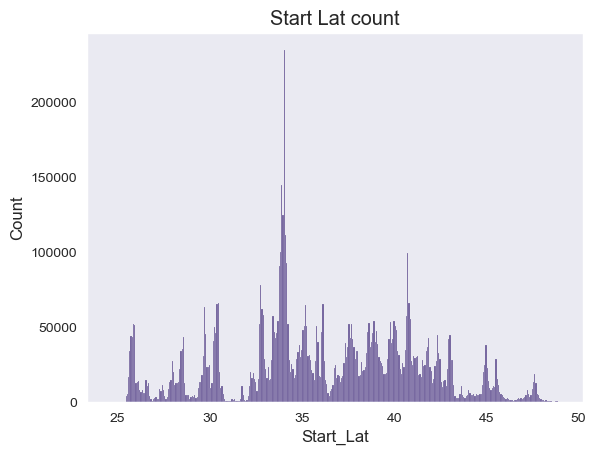

In [29]:
sns.histplot(data = df, x = "Start_Lat")
plt.title("Start Lat count")
plt.show()

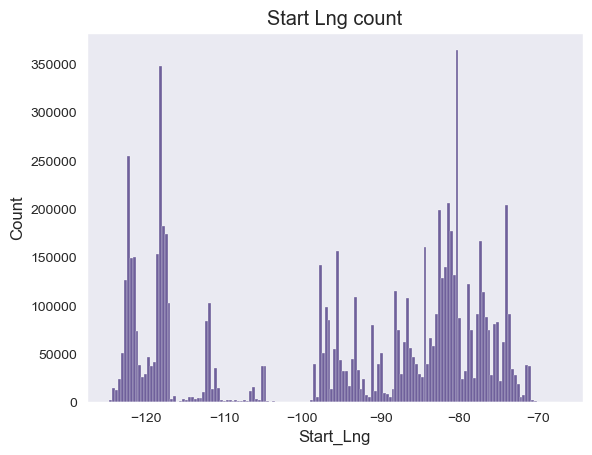

In [30]:
sns.histplot(data = df, x = "Start_Lng")
plt.title("Start Lng count")
plt.show()

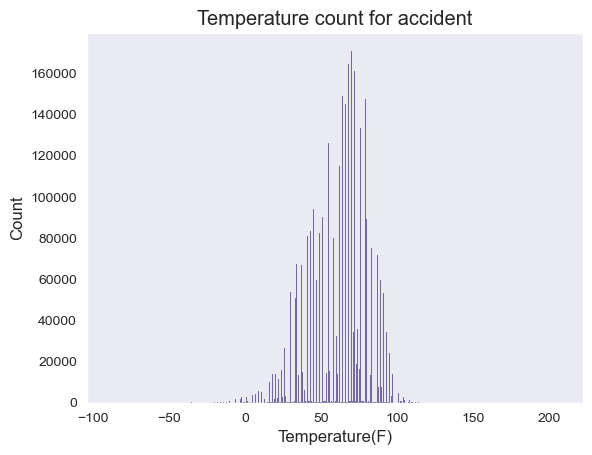

In [31]:
sns.histplot(data = df, x = "Temperature(F)")
plt.title("Temperature count for accident")
plt.show()

In [32]:
df['Severity'].value_counts().sort_index()

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

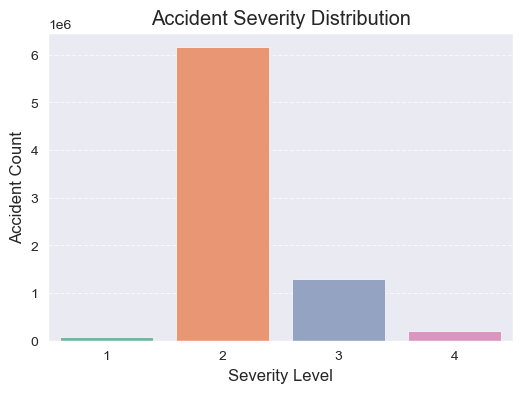

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Severity', order=sorted(df['Severity'].unique()), palette='Set2')
plt.title('Accident Severity Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Accident Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

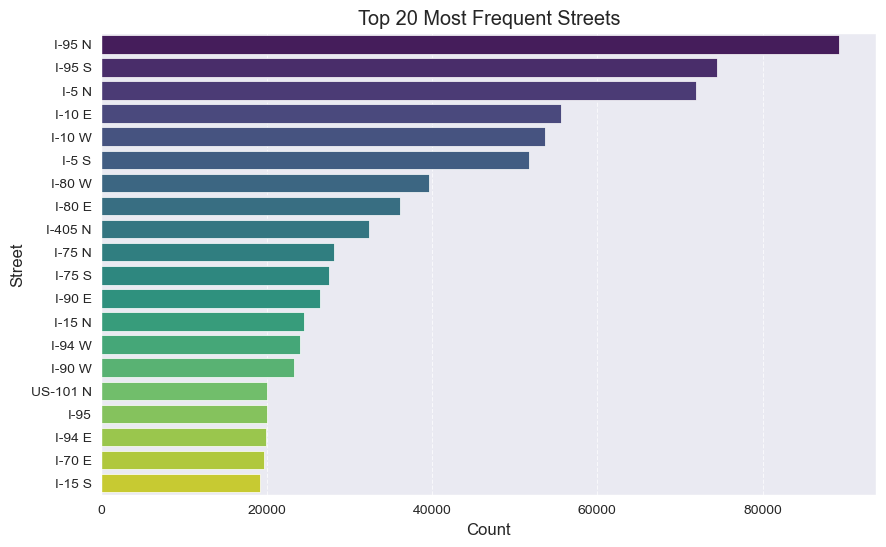

In [34]:
col = 'Street'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

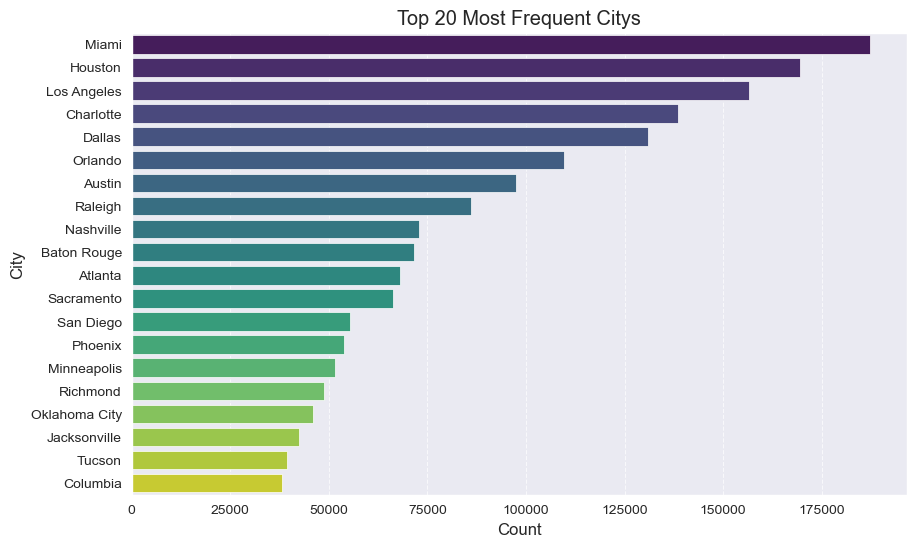

In [35]:
col = 'City'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

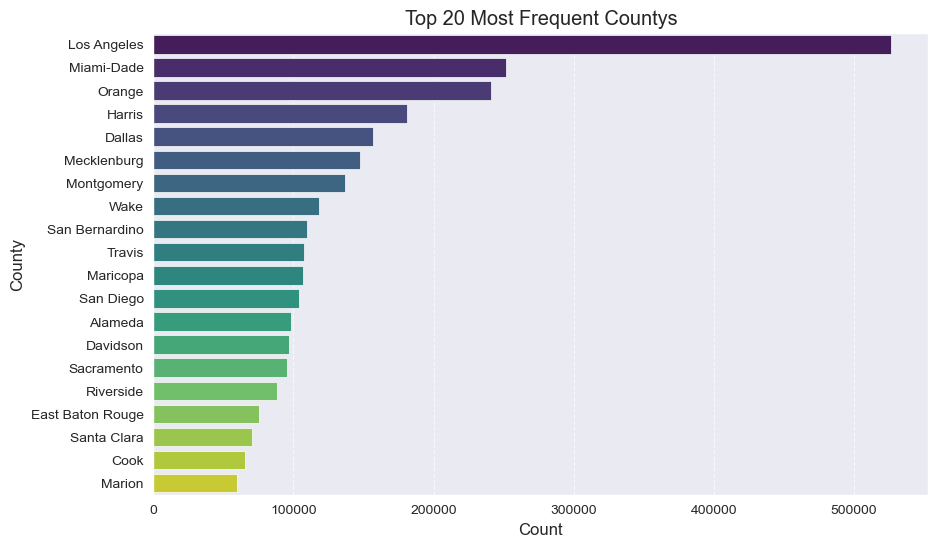

In [36]:
col = 'County'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

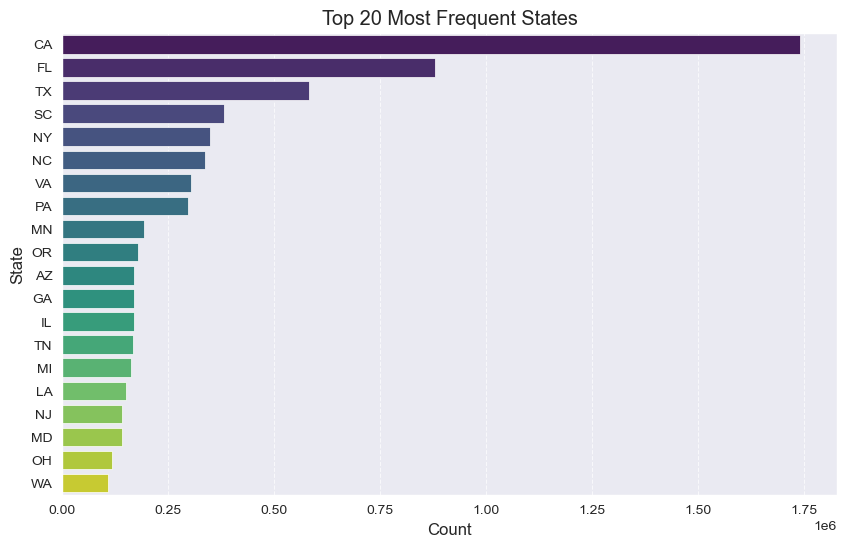

In [37]:
col = 'State'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

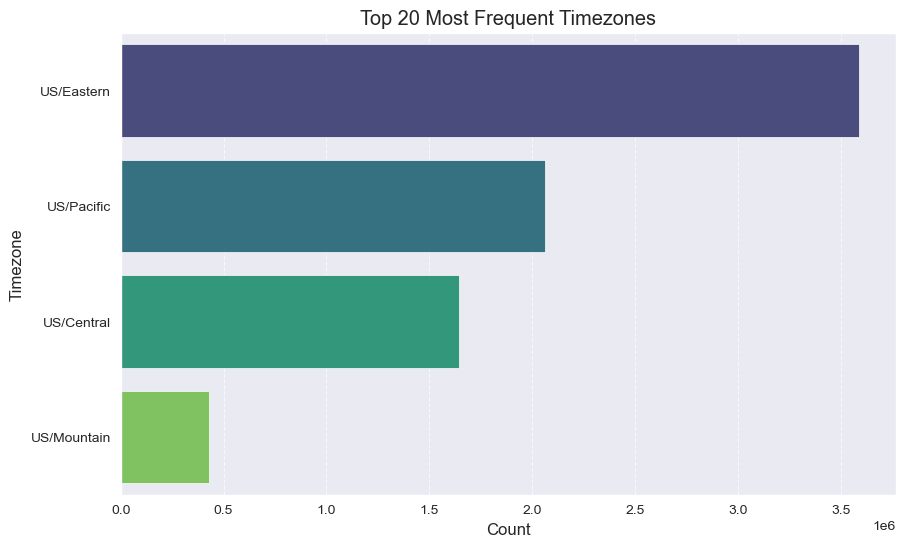

In [38]:
col = 'Timezone'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

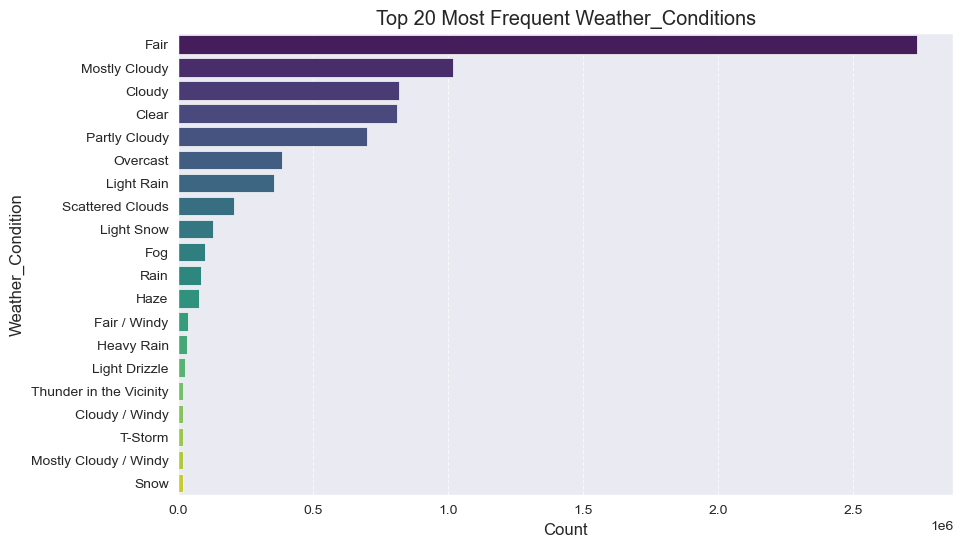

In [39]:
col = 'Weather_Condition'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
col = 'Sunrise_Sunset'
top_categories = df[col].value_counts().head(20)

plt.figure(figsize=(10,6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
plt.title(f'Top 20 Most Frequent {col}s')
plt.xlabel('Count')
plt.ylabel(col)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [40]:
df['Amenity'].value_counts()

Amenity
False    7632060
True       96334
Name: count, dtype: int64

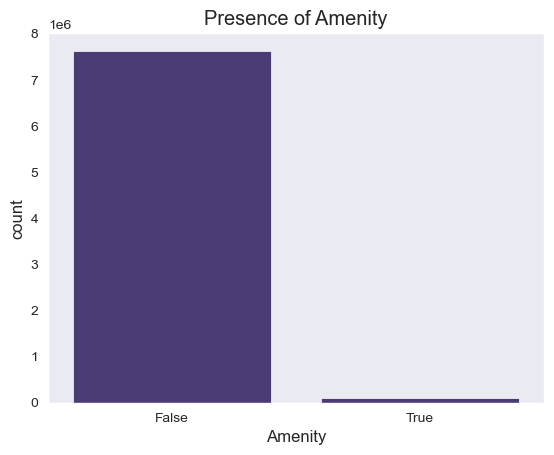

In [41]:
sns.countplot(x='Amenity', data=df)
plt.title('Presence of Amenity')
plt.show()

In [42]:
df['Bump'].value_counts()

Bump
False    7724880
True        3514
Name: count, dtype: int64

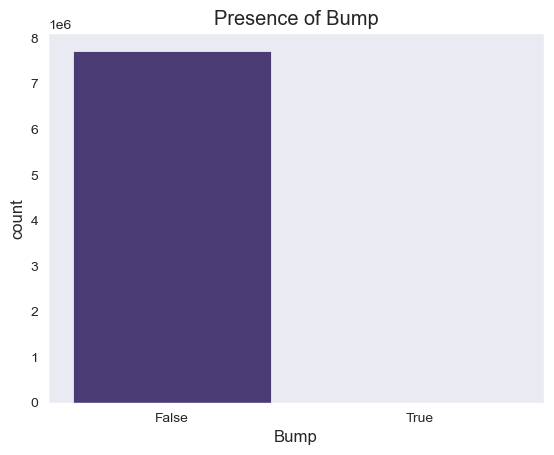

In [43]:
sns.countplot(x='Bump', data=df)
plt.title('Presence of Bump')
plt.show()

In [44]:
df['Crossing'].value_counts()

Crossing
False    6854631
True      873763
Name: count, dtype: int64

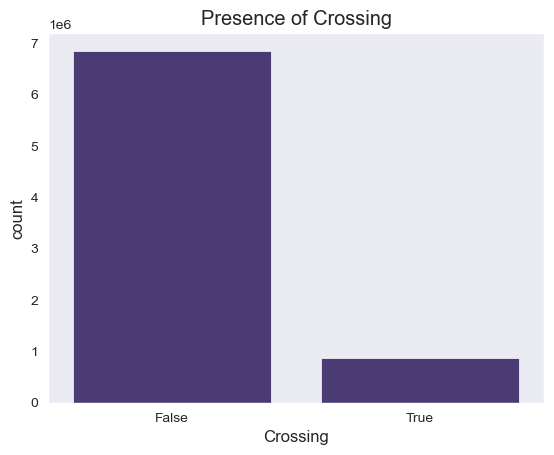

In [45]:
sns.countplot(x='Crossing', data=df)
plt.title('Presence of Crossing')
plt.show()

In [46]:
df['No_Exit'].value_counts()

No_Exit
False    7708849
True       19545
Name: count, dtype: int64

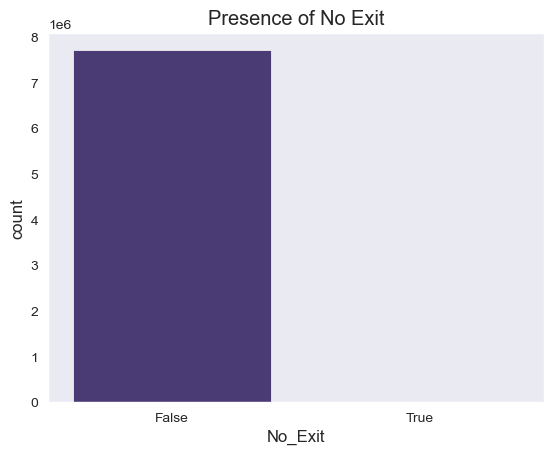

In [47]:
sns.countplot(x='No_Exit', data=df)
plt.title('Presence of No Exit')
plt.show()

In [48]:
df['Railway'].value_counts()

Railway
False    7661415
True       66979
Name: count, dtype: int64

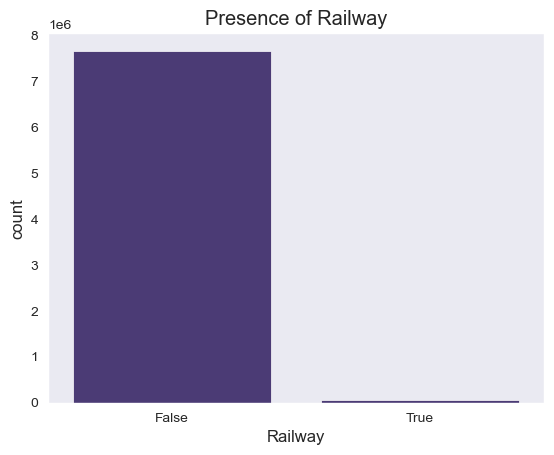

In [49]:
sns.countplot(x='Railway', data=df)
plt.title('Presence of Railway')
plt.show()

In [50]:
df['Roundabout'].value_counts()

Roundabout
False    7728145
True         249
Name: count, dtype: int64

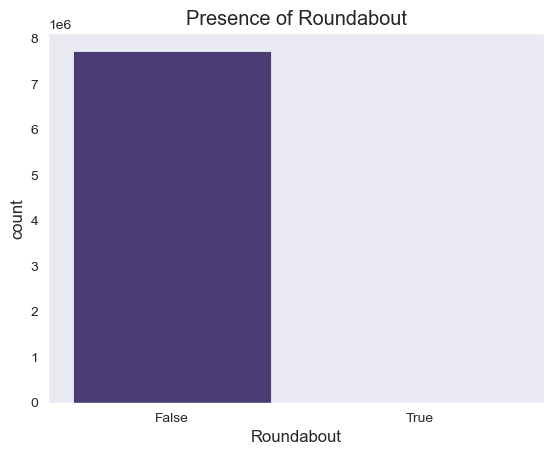

In [51]:
sns.countplot(x='Roundabout', data=df)
plt.title('Presence of Roundabout')
plt.show()

In [52]:
df['Station'].value_counts()

Station
False    7526493
True      201901
Name: count, dtype: int64

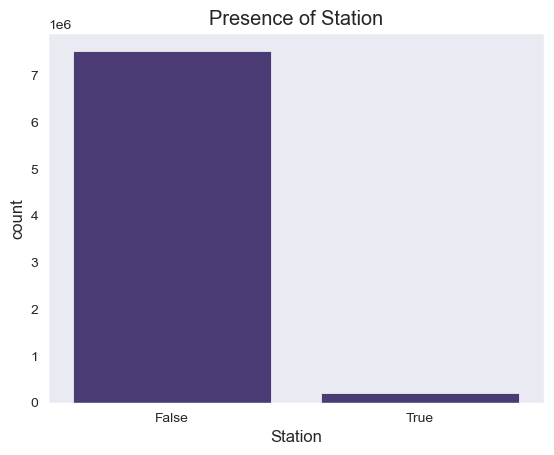

In [53]:
sns.countplot(x='Station', data=df)
plt.title('Presence of Station')
plt.show()

In [54]:
df['Stop'].value_counts()

Stop
False    7514023
True      214371
Name: count, dtype: int64

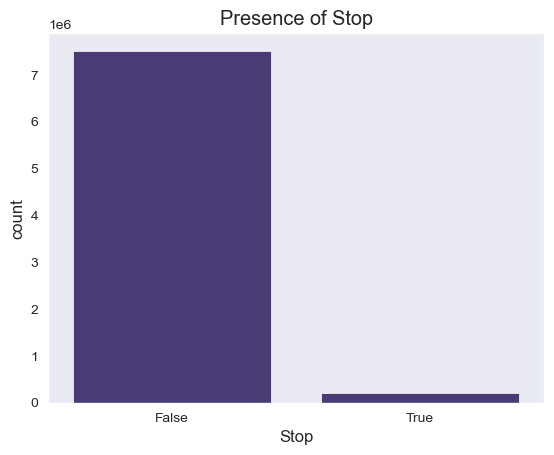

In [55]:
sns.countplot(x='Stop', data=df)
plt.title('Presence of Stop')
plt.show()

In [56]:
df['Traffic_Signal'].value_counts()

Traffic_Signal
False    6584622
True     1143772
Name: count, dtype: int64

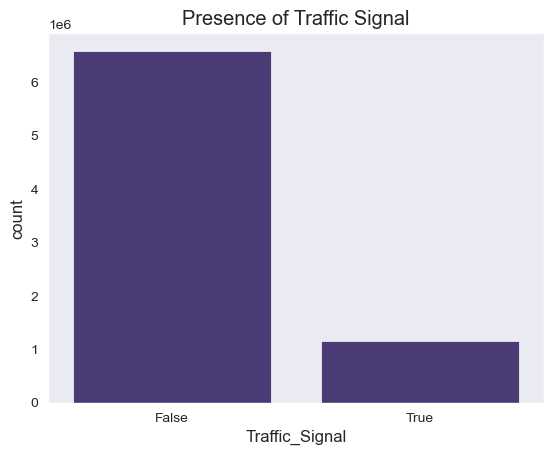

In [57]:
sns.countplot(x='Traffic_Signal', data=df)
plt.title('Presence of Traffic Signal')
plt.show()

In [58]:
df['Turning_Loop'].value_counts()

Turning_Loop
False    7728394
Name: count, dtype: int64

**Bivariate Analysis**

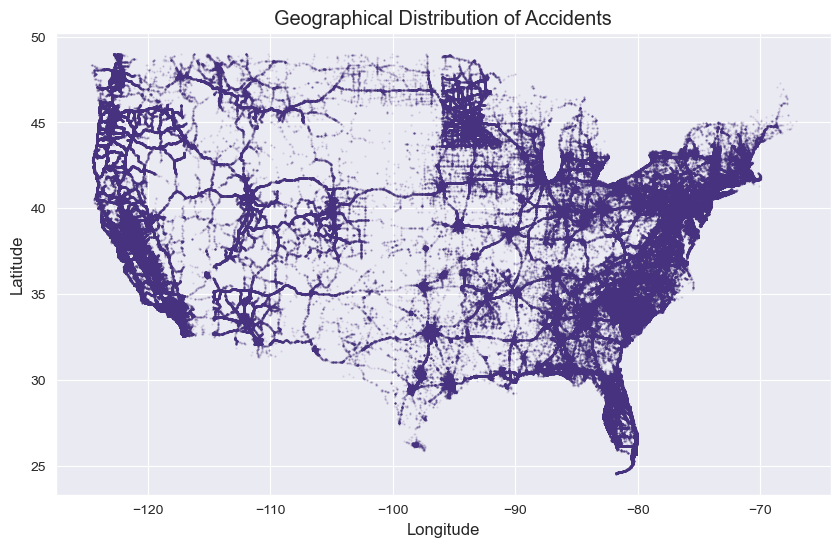

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Start_Lng'], df['Start_Lat'], alpha=0.1, s=1)
plt.title('Geographical Distribution of Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [63]:
# Sample first 10,000 rows to avoid browser lag
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(10000)

# Create base map centered in the US
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']].values, radius=8).add_to(m)

m.save('accident_heatmap.html')

# Show map
m

In [64]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

# Sample with city info
sample_df = df[['Start_Lat', 'Start_Lng', 'City']].dropna().sample(1000)  

# Create base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap layer
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)

# Add marker clusters with city names
marker_cluster = MarkerCluster().add_to(m)
for idx, row in sample_df.iterrows():
    folium.Marker(
        location=[row['Start_Lat'], row['Start_Lng']],
        popup=f"City: {row['City']}"
    ).add_to(marker_cluster)

# Save & display
m.save('accident_heatmap_with_cities.html')
m

In [66]:
import folium
from folium.plugins import HeatMap, MarkerCluster

# Sample rows with street info (keep sample small to avoid lag)
sample_df = df[['Start_Lat', 'Start_Lng', 'Street']].dropna().sample(1000)

# Create base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add heatmap layer (just location for intensity)
HeatMap(data=sample_df[['Start_Lat', 'Start_Lng']], radius=8).add_to(m)

# Add marker cluster with street names as popups
marker_cluster = MarkerCluster().add_to(m)
for idx, row in sample_df.iterrows():
    folium.Marker(
        location=[row['Start_Lat'], row['Start_Lng']],
        popup=f"Street: {row['Street']}"
    ).add_to(marker_cluster)

# Save & show map
m.save('accident_heatmap_with_streets.html')
m


In [65]:
continous = ["Start_Lat", "Start_Lng", "Temperature(F)"]
count = ["Severity"]
categorical = ["Street", "City","County", "State", "Timezone", "Weather_Condition", "Sunrise_Sunset", "Amenity", "Bump", "Crossing", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Signal", "Turning_Loop"]
timeseries = ["Start_Time", "Weather_Timestamp"]